# Python and NetCDF climate data
Unlike MatLab, Python does not have native support for multidimensional NetCDF datasets. Instead, we have to import a few specific packages into our script and do a few extra steps to manipulate the data. The notebook below demonstrates the steps needed to import, link variables representing the different dimensions, and run simple analyses on netCDF data.  

In the example here, we'll use daily precipitation predictions downscaled to a 1/16-degree resolution spanning the years 1990 to 2005. Thus, our data has 4 dimensions: `latitude`, `longitude`, `time`, and `precipitation`. *(Actually, the dataset has a 5th "dimension" as well, but this only includes data on the geographic coordinate reference system and has only one value, so we'll ignore it)*. 

Resources: 
* http://www.ceda.ac.uk/static/media/uploads/ncas-reading-2015/10_read_netcdf_python.pdf

## 1. Import the `.nc` data file into our Python script as netCDF4 `dataset` object
The Python *NetCDF4* package allows us to read in our `.nc` file into a NetCDF4 `dataset` object that we can manipulate programmatically. Documentation on the NetCDF4 package is here: http://unidata.github.io/netcdf4-python/, and it displays the various *properties* and *methods* of the `dataset` object. 

In [1]:
#Import package to read netCDF file
import netCDF4

In [2]:
#Read the file into a netCDF dataset object
fileName = 'macav2livneh_pr_bcc-csm1-1_r1i1p1_historical_1990_2005_CONUS_monthly.nc'
dataset = netCDF4.Dataset(fileName)

In [3]:
#Confirm that the `dataset` variable points to a netCDF4 dataset object
type(dataset)

netCDF4._netCDF4.Dataset

In [4]:
#Show some documentation on the `dataset` object
?dataset

In [5]:
dataset.file_format

'NETCDF4'

## 2. Explore out netCDF dataset
With our dataset object created, we can explore a bit about the data within it and its structure. Specifically, we'll examine what <u>dimensions</u>, <u>variables</u>, and <u>attributes</u> are contained within the dataset

### 2.1 Dimensions
The dimensions in our dataset are accessed as a Python **dictionary**, which is a collection of values referenced by specific keys. Here, each dimension is listed as a *key*, and to get information about that dimension, we "look up" its definition in the dictionary: 

In [6]:
#Show the full dimensions dictionary
dataset.dimensions

OrderedDict([('lat',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 444),
             ('lon',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 922),
             ('time',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 192),
             ('crs',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'crs', size = 1)])

In [7]:
#Show just the keys, or dimensions, in the dataset
dataset.dimensions.keys()

odict_keys(['lat', 'lon', 'time', 'crs'])

In [8]:
#Show the values associated with the `time` dimension
dataset.dimensions['time']

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 192

► *<u>Now you try it</u>: Show the values associated with the "lat" dimension. How many items are in this dimension? How many in the 'lon' and 'crs' dimensions?*

In [9]:
dataset.dimensions['lat']

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 444

Summing up, we see our dataset has 4 dimensions: 
* `lat` with 444 values
* `lon` with 922 values
* `time` with 192 values, and 
* a coordinate reference system (`crs`) with one value

### 2.2 Variables
Like dimensions, the dataset's variables are accessed as dictionary objects. First let's list all the variables contained in our datset by exposing the "keys" included in the dictionary. 
Our dataset has 5 variables:

In [10]:
#Show the 'key' or names of the variables
dataset.variables.keys()

odict_keys(['lat', 'lon', 'time', 'precipitation', 'crs'])

We see many of the same names as the dimensions, but also a *precipitation* variable. 
* `lat`
* `lon`
* `time`
* `precipitation`
* `crs`

In [11]:
#Show attributes of the precipitation variable
dataset.variables['precipitation']

<class 'netCDF4._netCDF4.Variable'>
float32 precipitation(time, lat, lon)
    _FillValue: -9999.0
    long_name: Monthly Precipitation Amount
    units: mm
    grid_mapping: crs
    standard_name: precipitation
    cell_methods: time: sum(interval: 24 hours): sum over days
    coordinates: time lon lat
    comments: Total monthly precipitation at surface: includes both liquid and solid phases from all types of clouds (both large-scale and convective)
unlimited dimensions: 
current shape = (192, 444, 922)
filling on

### 2.3 Attributes
NetCDF datasets have both global attributes and attributes associated with each variable. Here's how we explore what attributes are included in each and how to access information on each attribute

#### 2.3.1 Global attributes
Listing the datset's **global** attributes is done bit differently than the process for dimensions and variables. Here, the `ncattrs()` function returns a list of the dataset's global attributes. Then we can display more information on any of these attributes using the `getattr()` function. 

In [12]:
#List the dataset's attributes
dataset.ncattrs()

['description',
 'id',
 'naming_authority',
 'Metadata_Conventions',
 'Metadata_Link',
 'cdm_data_type',
 'title',
 'summary',
 'keywords',
 'keywords_vocabulary',
 'standard_name_vocabulary',
 'comment',
 'license',
 'geospatial_bounds',
 'geospatial_lat_min',
 'geospatial_lat_max',
 'geospatial_lon_min',
 'geospatial_lon_max',
 'geospatial_lat_units',
 'geospatial_lon_units',
 'geospatial_lat_resolution',
 'geospatial_lon_resolution',
 'geospatial_vertical_min',
 'geospatial_vertical_max',
 'geospatial_vertical_resolution',
 'geospatial_vertical_positive',
 'time_coverage_start',
 'time_coverage_end',
 'time_coverage_duration',
 'time_coverage_resolution',
 'date_created',
 'date_issued',
 'creator_name',
 'creator_url',
 'creator_email',
 'institution',
 'processing_level',
 'project',
 'contributor_name',
 'contributor_role',
 'publisher_name',
 'publisher_email',
 'publisher_url',
 'NCO',
 'history',
 'date_modified',
 'coordinate_system']

In [13]:
#Display information stored in the `summary` attribute
dataset.summary

'This archive contains downscaled meteorological and hydrological projections for the Conterminous United States at 1/16-deg resolution utilizing the Multivariate Adaptive Constructed Analogs (MACA, Abatzoglou, 2012) statistical downscaling method with the Livneh et al (2013) training dataset. The downscaled meteorological variables are maximum/minimum temperature(tasmax/tasmin), precipitation amount(pr), downward shortwave solar radiation(rsds), wind speed(was), and specific humidity(huss). The downscaling is based on the 365-day model outputs from different global climate models (GCMs) from Phase 5 of the Coupled Model Inter-comparison Project (CMIP3) utlizing the historical (1950-2005) and future RCP4.5/8.5(2006-2099) scenarios. Leap days have been added to the dataset from the average values between Feb 28 and Mar 1 in order to aid modellers.'

#### 2.3.2 Variable attributes
Now we'll focus on the attributes of a single variable in our datatset. We'll choose the `precipitation` variable. 

In [14]:
#List the precipitation variable's attributes
dataset.variables['precipitation'].ncattrs()

['_FillValue',
 'long_name',
 'units',
 'grid_mapping',
 'standard_name',
 'cell_methods',
 'coordinates',
 'comments']

In [15]:
#Reveal the information associated with the "cell_methods" attribute
dataset.variables['precipitation'].cell_methods

'time: sum(interval: 24 hours): sum over days'

*There's a lot going on in the above statements. It works, but it can be hard to read for the newbie. One of the advantanges of Python code is its readability, but this only works of coders write the code to be readable. So, let's rewrite the above statement so that it's more readable. It appears less "efficient", but sometimes readability is better than terseness.*

In [16]:
#Pull the precipitation variable into a Python variable called "precip"
precip = dataset.variables['precipitation']
#Now list its attributes
precip.ncattrs()

['_FillValue',
 'long_name',
 'units',
 'grid_mapping',
 'standard_name',
 'cell_methods',
 'coordinates',
 'comments']

With the `precip` Python variable established, we can use it to display attribute contents directly

In [ ]:
precip._FillValue

---
## 3. Working with the data
With some familiarity of what's in the dataset, we can now start manipulating and visualizing the data...

### 3.1 Import the variables into netCDF4 `variable` objects
Let's now break our dataset into its component variables so that we can work with each more easily. Here, we assign Python variables to the four dataset variables: `time`, `latitute`, `longitude`, and `precipitation`. (We'll ignore the `crs` variable as that contains only one value, a metadata value listing the coordinate system used.) Then, we'll quickly examine some properties of these variable objects. 

In [17]:
#Read the variables in NETCDF file
ncTime = dataset.variables['time']
ncLon = dataset.variables['lon']
ncLat = dataset.variables['lat']
ncPrecip = dataset.variables['precipitation']

In [18]:
#Confirm that these objects are netCDF4 variables
type(ncPrecip)

netCDF4._netCDF4.Variable

In [19]:
#Display what we can do with a variable object
?ncPrecip

In [20]:
#What if we just display everything about the variable?
ncPrecip

<class 'netCDF4._netCDF4.Variable'>
float32 precipitation(time, lat, lon)
    _FillValue: -9999.0
    long_name: Monthly Precipitation Amount
    units: mm
    grid_mapping: crs
    standard_name: precipitation
    cell_methods: time: sum(interval: 24 hours): sum over days
    coordinates: time lon lat
    comments: Total monthly precipitation at surface: includes both liquid and solid phases from all types of clouds (both large-scale and convective)
unlimited dimensions: 
current shape = (192, 444, 922)
filling on

► *<u>Now you try it</u>: Recalling how we revealed the attributes of the `precip` variable above, what are the units of the `time` variable? The `lat` and `lon` variables?*

In [21]:
ncTime.units, ncLat.units, ncLon.units

('days since 1900-01-01 00:00:00', 'degrees_north', 'degrees_east')

**Variable shape**: These four variables are all <u>arrays</u>, i.e. a series of values set across one or or more dimensions. We can examine the size and dimensions of each variable via its `shape` property:

In [22]:
ncTime.shape

(192,)

In [23]:
ncLat.shape

(444,)

In [24]:
ncLon.shape

(922,)

In [25]:
ncPrecip.shape

(192, 444, 922)

**Note** that the size of the three dimensions of the `precip` variable corresponds to the size of the `time`, `lat`, and `lon` variables, respectively. <u>*This gives a more tangible sense of how these data are structured and how we can manipulate our data.*</u>

More specifically, we see that the data in the `precip` variable is 3 dimensional. The first dimension is time, and the other two dimensions are x-y coordinates in space. So we can <u>envision our data as a stack of precipitation maps, with each layer in the stack as precipitation values for a single time snapshot.</u> This helps us in subsetting our data...

What may not be clear here is: *what then are the `time`, `lat`, and `lon` variables, if everything is held in the one `precip` variable?* This has everything to do with the fact that the actual data (i.e., the amount of precipitation) are referenced by their *index position* in the array, as we'll see in a moment. It'd be confusing to explain this in more detail at the moment. Instead, let's move a bit further with the data and then we'll come back to this. 


---
### 3.2 Extracting data from our variables

#### 3.2.1 Extract a single value (i.e. single location-time value)
The `precip` variable has 3 axes: `time`,`lat`, and `lon`, with sizes of 192, 444, and 922, respectively. And the value at a given time/geographic coordinate is the predicted rainfall at that specific time/location. We can extract a specific precipitation value by specifying a `time`, `lat`, and `lon` value:

In [26]:
print(ncPrecip[0,250,300])

37.11904


The interpolated precipitation at that time/location is `37 mm`. 

<u>But what time and location did we actually specify??</u> *What is time=0?? Likewise, a latitude of "250" and a longitude of "300" are not really geographic coordinates.* 

These values are actually pointers to the **positions** in the precipitation array, that is, the 1st time slice, the 251st "latitude" column, and the 301st "longitude" column - if you think of our precipitation array as a stack of lat/long tables, with a layer for each time. (Also note that Python indices are zero-based, meaning the values start at zero, not 1.)

**So how, then, do we extract data for a known time and/or location?** Well, those data are contained in the other arrays, with positions corresponding to the axes in the precipitation array:

In [27]:
print(ncTime[0])
print(ncLat[250])
print(ncLon[300])

32864.0
40.78125
254.15625


So, we see that the precipitation value extracted above is associated with the location (`40.71824°N`,`254.15625°W`) and the time "`32864`"??!?

That time value is actually days since 01-01-1990 (found in the datasets metadata):

In [28]:
ncTime.units

'days since 1900-01-01 00:00:00'

And we have tools to conver this into a more readable format:

In [29]:
#Create a new array, converting days since 1900 to a date time value
ncTime2 = netCDF4.num2date(ncTime[:],ncTime.units)
ncTime2[0]

datetime.datetime(1989, 12, 24, 0, 0)

And we see the first time slice is Dec 12, 1989. 

So now what we have to do is somehow cross-reference the *values* in the `time2`, `lat`, and `lon` arrays with the *axes* in the precipitation array. In doing so, we can more easily extract values we want and run various analyses on the data. 

## 4. Python's NumPy (numeric Python) package

### 4.1 Converting the netCDF4 variable into NumPy arrays
The process to do this involves converting each of our NetCDF variabls into numeric arrays which then allows us to use Python's **NumPy** package to do exactly what we need to do...

In [30]:
#Import the numpy package, calling it "np" to save typing
import numpy as np

In [31]:
#Convert the NetCDF variables to numpy arrays 
arrTime = ncTime2[:].astype(np.datetime64)
arrLat = ncLat[:]
arrLon = ncLon[:]
arrPrecip = ncPrecip[:]

In [32]:
#Show the type of object created
type(arrPrecip)

numpy.ma.core.MaskedArray

### 4.2 Working with NumPy arrays
The netCDF variables were converted to Numpy *masked arrays*. This means that, in addition to the N-dimensional numeric array, we have an associated n-dimensional array, but one with boolean values that indicate whether the data should be used in calculations or not.  

In [33]:
#Show the shape of the precip array
arrPrecip.shape

(192, 444, 922)

Numpy arrays work much like the netCDF variables in terms of querying values using their position...

In [34]:
arrPrecip[0,250,300]

37.11904

In [35]:
arrTime[0]

numpy.datetime64('1989-12-24T00:00:00.000000')

In [36]:
arrLat[250]

40.78125

In [37]:
arrLon[300]

254.15625

### 4.3 Subsetting our data
With our variable stored as NumPy arrays, we can use NumPy methods to slice our data across time and/or space. We'll begin simply by just [blindly] using raw position values (i.e. not actual times or lat/long coordinates) to do first a time series plot and then a simple map for a single time slice. 

#### 4.3.1 Time series for one location
To extract precipitation across all time for one location (here we'll choose the `lat` at position `250` and the lon at postition `300`), we use a colon to say "grab all values" at the first axis (`time`), then then specific values for the `lat` and `lon` axes. 

In [40]:
#Grab all the precip data at location lat=200 and lon=300
arrPrecipLocX = arrPrecip[:,250,300]

In [41]:
#What is the shape of the result: should be 192 
arrPrecipLocX.shape

(192,)

In [42]:
#Show the first 10 values in the resulting array
arrPrecipLocX[0:10].data

array([ 37.11904 ,  64.036575,  45.392483, 122.75209 , 121.195694,
        19.678436,  25.675114,  75.88427 ,  42.54946 ,  56.04633 ],
      dtype=float32)

#### 4.3.2 Plotting - with NumPy & <u>MatPlotLib</u>
We use another library for plotting. Python has a few, but as you are likely familiar with Matlab, we'll use `matplotlib` which was desinged after Matlab's plotting procedures. 

In [43]:
#Import the pyplot subpackage and enable inline plotting
from matplotlib import pyplot as plt
%matplotlib inline

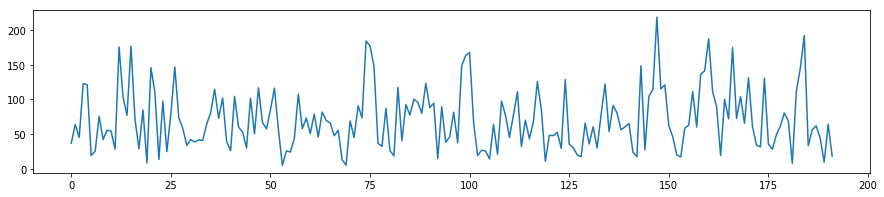

In [44]:
#Plot as a time series
fig = plt.figure(figsize=(15,3))
plt.plot(arrPrecipLocX);

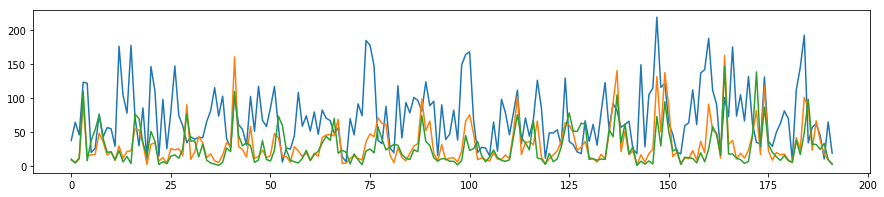

In [46]:
#Plot time series for three points long a longitudinal transect
fig = plt.figure(figsize=(15,3))
plt.plot(arrPrecip[:,250,300])
plt.plot(arrPrecip[:,300,300])
plt.plot(arrPrecip[:,350,300])
plt.show();

#### 4.3.3 Creating a location matrix for a single point in time, or average across all times

In [47]:
#Pull precip data for all lat/lon dimensions for the most recent record
arrPrecipRecent = arrPrecip[-1,:,:]
arrPrecipRecent.shape

(444, 922)

In [50]:
#Or, compute the mean across all time values (time = axis zero)
arrPrecipMean = arrPrecip.mean(axis=0)
arrPrecipMean.shape

(444, 922)

In [51]:
#Or, compute the mean across all time values (time = axis zero) for a spatial subset
arrPrecipMeanSubset = arrPrecip[:,250:300,300:400].mean(axis=0)
arrPrecipMeanSubset.shape

(50, 100)

#### 4.3.4 Plotting in two dimensions
Matplotlib's `imshow` function allows us to plot images, i.e., data stored with X/Y coordinates, as we have. 

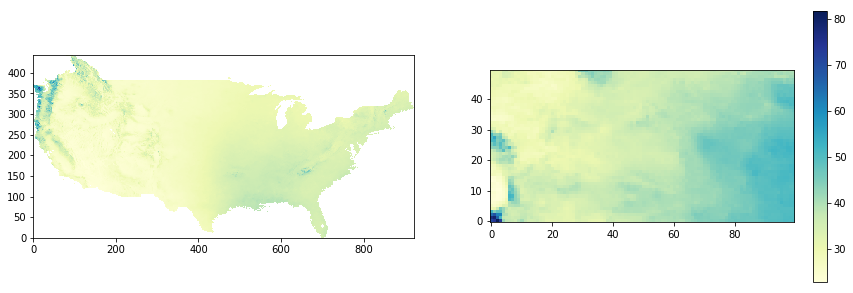

In [57]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(arrPrecipMean,origin=(0,0),cmap="YlGnBu")
plt.subplot(1,2,2)
plt.imshow(arrPrecipMeanSubset,origin=(0,0),cmap="YlGnBu")
plt.colorbar();

---
## 5. Pandas
**Numpy** works great for computations on n-dimensional arrays, but the axes are still a bit befuddling as they can only be accessed via position, not actual time stamps or actual lat-long coordinates. You can see that easily in the map we just created: the coordinates are *image* coordinates, not geographic ones (e.g. degrees north and degrees east). 

Numpy has a companion Python package called **Pandas** (a contraction of *Pan*el *Da*ta) that overcomes this issue by allowing us to store and manipulate our data in **data frames**. The key difference [for us] between *Numpy's ndarrays* and *Pandas' dataframes* is the ability to name and label columns and rows so we can move beyond just integer indices. 

The drawback, however, is that dataframes require data to be stored in two dimensions, i.e., in rows and columns. (There are ways around that, using something called a hierarchical multiindex, but more on that later...). 

### 5.1 Reducing and converting our NumPy arrays to Pandas dataframes
Anyway, let's convert our Numpy arrays to Pandas dataframes. Of course, before we can do that, we need to ***reduce*** our data to two or fewer dimensions. We've done that above, creating the time series dataset (by reducing the lat and lon dimensions to a single location), and by creating the mapped dataset (by reducing the time dimension to a single point in time or by averaging all time values into one value.)  

In [63]:
#Import pandas
import pandas as pd

#### 5.1.1 Full process from netCDF4 variable to 2d Pandas dataframes
Let's review the whole process...

In [58]:
#Pull the precip variable from the netCDF dataset
precip = dataset.variables['precipitation']

In [59]:
#Convert the netCDF variable to a 3-d numpy array
arrPrecip = precip[:]
arrPrecip.shape

(192, 444, 922)

In [60]:
#Reduce the 3d array to a 1d array
arrTimeSeries = arrPrecip[:,250,300]
arrTimeSeries.shape

(192,)

In [61]:
#Reduce the 3d array to a 2d array, collapsing the time dimension into average values
arrMeanPrecip = arrPrecip.mean(axis=0)
arrMeanPrecip.shape

(444, 922)

In [86]:
#Convert the 1d time series array to a dataframe
dfTimeSeries=pd.DataFrame(arrTimeSeries)
dfTimeSeries.shape

(192, 1)

In [65]:
#Display the first 5 records
dfTimeSeries.head()

,0
0,37.119041
1,64.036575
2,45.392483
3,122.752090
4,121.195694


In [66]:
#Convert the 2d mean values to a dataframe
dfMeanPrecip=pd.DataFrame(arrMeanPrecip)
dfMeanPrecip.shape

(444, 922)

In [67]:
#Display the first 5 records of the 
dfMeanPrecip.head()

,0,1,2,3,4,5,6,7,8,9,...,912,913,914,915,916,917,918,919,920,921
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5.1.2 Adding column names and indices to our dataframes
***♦ Note that the rows and columns remain as simple integers, not actual times or lat/long coordinates***.

By adding row and column labels to our dataset - using the `time`, `lat`, and `lon` variable values to assign those row & column names, we can then manipulate our data using those values (as compared to just integers in numpy arrays). 

**Note**: row labels are called indices in Pandas

* First, we import the variable values in to Pandas *series* objects. Series are just 1d arrays. 

In [114]:
#Convert the time, lat, and lon variables to Pandas series objects (series b/c 1 dimension)
ncTime = dataset.variables['time']
seriesTime = pd.Series(netCDF4.num2date(ncTime[:],ncTime.units))
seriesLat = pd.Series(dataset.variables['lat'][:])
seriesLon = pd.Series(dataset.variables['lon'][:])
print(seriesTime.shape,seriesLat.shape,seriesLon.shape)

(192,) (444,) (922,)


Now we can assign those values to the dataFrame column name and row indices...

In [121]:
#Set the index of the time series dataframe to the actual times
dfTimeSeries.index = seriesTime
dfTimeSeries.head(3)

,0
1989-12-24,37.119041
1990-01-24,64.036575
1990-02-21,45.392483


In [119]:
#Add column names and an index to the dfMeanPrecip dataframe
dfMeanPrecip.columns = seriesLon
dfMeanPrecip.index = seriesLat
dfMeanPrecip.head()

,235.40625,235.46875,235.53125,235.59375,235.65625,235.71875,235.78125,235.84375,235.90625,235.96875,...,292.40625,292.46875,292.53125,292.59375,292.65625,292.71875,292.78125,292.84375,292.90625,292.96875
25.15625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.21875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.28125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.34375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.40625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5.2 Subsetting data in Pandas dataframes
### 5.2.1 Selecting a *slice* of time
With our data in Pandas dataframe and the actual times set as the index, we can select, subset, or **slice** our data on *actual times*.

In [127]:
#Subset the data for the years 2000 to 2004
df_subset = dfTimeSeries[(dfTimeSeries.index >= '2000') & 
                         (dfTimeSeries.index < '2004')]

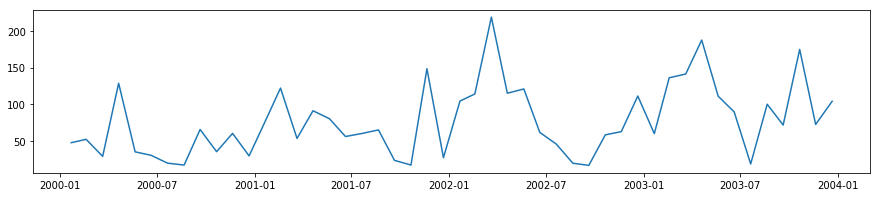

In [128]:
#Plot the subset
fig = plt.figure(figsize=(15,3))
plt.plot(df_subset);

♦ **AND** we get the actual dates on the axis! 

---

### 5.2.2 Spatial slices
Here we create Boolean masks to filter our datasets on the lat and lon axes. 

In [167]:
dfX = dfMeanPrecip.reset_index()
dfX.head()

,index,235.40625,235.46875,235.53125,235.59375,235.65625,235.71875,235.78125,235.84375,235.90625,...,292.40625,292.46875,292.53125,292.59375,292.65625,292.71875,292.78125,292.84375,292.90625,292.96875
0,25.15625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.21875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.28125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.34375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.40625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
dfX=dfMeanPrecip.reset_index().melt(var_name="lon",value_name="precip",id_vars='index')
dfX.columns = ['lat','lon','precip']
dfX.head()

,lat,lon,precip
0,25.15625,235.406,NaN
1,25.21875,235.406,NaN
2,25.28125,235.406,NaN
3,25.34375,235.406,NaN
4,25.40625,235.406,NaN


In [150]:
latFilter = (dfMeanPrecip.index > 2000) & (dfMeanPrecip.index < 2005)
lonFilter = 

#### 4.2.2 Creating a map for one time slice
What if we fix time and then plot data across space? Well create a 2d array for one time snapshot and then map it.

In [ ]:
import matplotlib.image as mpimg

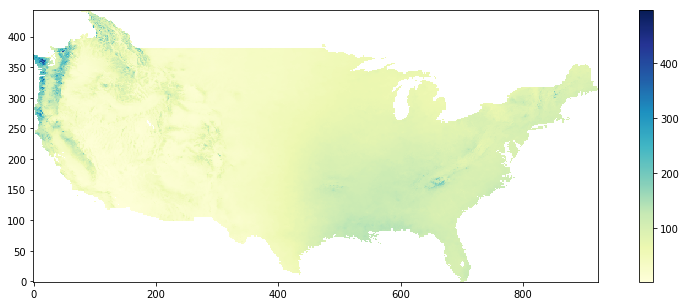

In [173]:
fig = plt.figure(figsize=(15,5))
plt.imshow(dfMeanPrecip,origin=(0,0),cmap="YlGnBu")
plt.colorbar();